# Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

# Exercise 1

### Single-Layer Neural Network

Single layer neural network\
One neuron with input features\
Weights associated with these features\
A bias\
Sigmoid activation function to make predictions\
Log loss

In [129]:
# Code for printing the decision boundary
def plot_decision_boundary (nn , X, y, title =" Decision Boundary "):
    x_min , x_max = X[:, 0]. min () - 1, X[:, 0]. max () + 1
    x_values = np. linspace (x_min , x_max , 300)
    print(x_values)

    """
    TODO : Calculate the y_values for the decision boundary line based on the
    model ’s weights , the x_values and the model bias .
    """
    y_values = -(nn.weights[0]/nn.weights[1]) * x_values - (nn.bias / nn.weights[1])
    # y_values = -(nn.weights[0] * x_values + nn.bias) / nn.weights[1]

    plt . scatter (X[:, 0], X[:, 1], c=y, s=20 , edgecolor ="k")
    plt . plot ( x_values , y_values , label =" Decision Boundary ")
    plt . xlim (x_min , x_max )
    plt . ylim (X[:, 1]. min () - 1, X[:, 1]. max () + 1)
    plt . title ( title )
    plt . legend ()
    plt . show ()

In [130]:
def sigmoid(z):
    '''
    Sigmoid activation function
    '''
    sigmoid_output = 1 / (1 + np.exp(-z))
    return sigmoid_output

In [233]:
class SingleLayerNN:
    def __init__(self, input_dimensions):
        # Init random weights and bias
        self.weights = np.random.rand(2)
        self.bias = np.random.rand()

    def predict(self, x):
        '''
        Sum up all the weights
        Add bias
        Use activation function and return output
        '''
        summed_weight = np.dot(self.weights.T, x) + self.bias
        prediction_output = sigmoid(summed_weight)
        return prediction_output

    def train(self, X, y, epochs, learning_rate):
        '''
        Define learning rate and make prediction
        Go through all of the epochs
        Predict the current states
        Calculate the loss for convenience
        Define the update rules and utilise them
        '''
        learning_rate = learning_rate
        
        plot_decision_boundary(self, X, y)

        # Decision boundary before training
        '''Call to the DecisionBoundaryFunction'''
        # plot_decision_boundary(nn=self, X=X, y=y)

        for epoch in range(epochs+1):
            if epoch == epochs:
                return

            # Make Prediction
            y_pred = self.predict(x=X)
            print(len(y_pred))

            # Calculating and printing loss
            loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            avg_loss = np.mean(loss)
            print(f"Currently in epoch {epoch+1}/{epochs} with average loss {avg_loss}")

            # Defining update rules
            delta = (y - y_pred)
            derivative = y_pred * (1 - y_pred)
            dw = learning_rate * np.dot(X, delta * derivative)
            db = learning_rate * delta * derivative

            # Update parameters
            self.weights = self.weights + dw
            self.bias = self.bias + db
        
        # plot_decision_boundary(self, X, y)
        
        # Decision boundary after training
        '''Call to the DecisionBoundaryFunction'''

In [234]:
# Generate synthetic data for two classes
n_samples = 100
features_class_0 = np.random.randn(n_samples, 2) + [2, -2] # Class 0
features_class_1 = np.random.randn(n_samples, 2) + [-2, 2] # Class 1

In [235]:
# Define training X, y
X = np.concatenate((features_class_0, features_class_1), axis=0)
y = np.concatenate((np.zeros(n_samples), np.ones(n_samples)), axis=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [236]:
single_layer_nn = SingleLayerNN(input_dimensions=2)

[-6.28372551 -6.24458412 -6.20544273 -6.16630134 -6.12715995 -6.08801857
 -6.04887718 -6.00973579 -5.9705944  -5.93145302 -5.89231163 -5.85317024
 -5.81402885 -5.77488746 -5.73574608 -5.69660469 -5.6574633  -5.61832191
 -5.57918053 -5.54003914 -5.50089775 -5.46175636 -5.42261497 -5.38347359
 -5.3443322  -5.30519081 -5.26604942 -5.22690804 -5.18776665 -5.14862526
 -5.10948387 -5.07034248 -5.0312011  -4.99205971 -4.95291832 -4.91377693
 -4.87463555 -4.83549416 -4.79635277 -4.75721138 -4.71806999 -4.67892861
 -4.63978722 -4.60064583 -4.56150444 -4.52236306 -4.48322167 -4.44408028
 -4.40493889 -4.3657975  -4.32665612 -4.28751473 -4.24837334 -4.20923195
 -4.17009057 -4.13094918 -4.09180779 -4.0526664  -4.01352501 -3.97438363
 -3.93524224 -3.89610085 -3.85695946 -3.81781807 -3.77867669 -3.7395353
 -3.70039391 -3.66125252 -3.62211114 -3.58296975 -3.54382836 -3.50468697
 -3.46554558 -3.4264042  -3.38726281 -3.34812142 -3.30898003 -3.26983865
 -3.23069726 -3.19155587 -3.15241448 -3.11327309 -3.

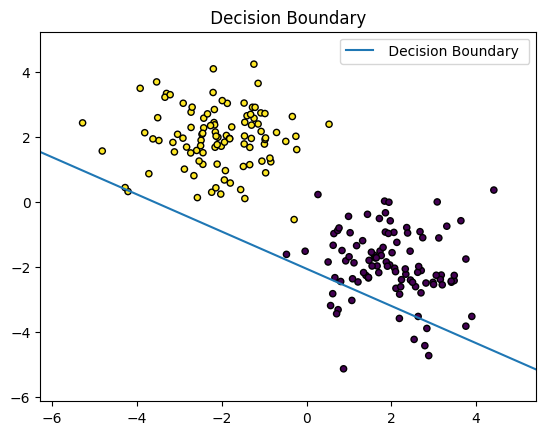

ValueError: shapes (2,) and (200,2) not aligned: 2 (dim 0) != 200 (dim 0)

In [237]:
single_layer_nn.train(X=X, y=y, epochs=10, learning_rate=0.01)

# Exercise 2

### Backpropagation

All kinds of crazy stuff about backpropagation

# Exercise 3

### Word Embeddings

All kinds of crazy stuff about word embeddings

# Exercise 4

### Text Prediction

All kinds of crazy stuff about text prediction

# Exercise 5

### Image Classification

All kinds of crazy stuff about image classification